In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy

In [ ]:
acs_data = pd.read_csv("Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv")
display(acs_data)

In [ ]:
obesity_data = pd.read_csv("Data/Nutrition_Physical_Activity_and_Obesity_Data.csv")

In [ ]:
meat_slaughter_count = pd.read_csv("Data/Meat_Stats_Slaughter_Counts.csv")
display(meat_slaughter_count)
meat_slaughter_count['Date'] = pd.to_datetime(meat_slaughter_count['Date'])
meat_slaughter_count['Count']=meat_slaughter_count['Count'].str.replace(',','')
meat_slaughter_count['Count'] = meat_slaughter_count['Count'].astype(float)
meat_slaughter_count['Year'] = meat_slaughter_count['Year'].astype(int)
meat_slaughter_count.drop(meat_slaughter_count[meat_slaughter_count.Year<1985].index, inplace=True)
monthly_meat_slaughter_count=meat_slaughter_count.groupby(['Date','Commercial_Or_Federally_Inspected','Type_Of_Meat'], as_index=False)['Count'].sum()
display(meat_slaughter_count)

In [ ]:
monthly_meat_slaughter_count.dropna(subset=['Count'], inplace=True)

fed_inspect_red_meat = monthly_meat_slaughter_count[(monthly_meat_slaughter_count['Commercial_Or_Federally_Inspected']=='Federally Inspected') & (monthly_meat_slaughter_count['Type_Of_Meat']=='Red Meat')]
fed_inspect_poultry = monthly_meat_slaughter_count[(monthly_meat_slaughter_count['Commercial_Or_Federally_Inspected']=='Federally Inspected') & (monthly_meat_slaughter_count['Type_Of_Meat']=='Poultry')]
commercial_red_meat = monthly_meat_slaughter_count[(monthly_meat_slaughter_count['Commercial_Or_Federally_Inspected']=='Commercial') & (monthly_meat_slaughter_count['Type_Of_Meat']=='Red Meat')]
commercial_poultry = monthly_meat_slaughter_count[(monthly_meat_slaughter_count['Commercial_Or_Federally_Inspected']=='Commercial') & (monthly_meat_slaughter_count['Type_Of_Meat']=='Poultry')]

In [ ]:


plt.plot(fed_inspect_poultry['Date'], fed_inspect_poultry['Count'], label='Federal Poultry', color = 'orange')
plt.plot(commercial_poultry['Date'], commercial_poultry['Count'], label='Commercial Poultry', color = 'green')

plt.title('Meat Slaughter Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count (1,000 Head)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
plt.plot(fed_inspect_red_meat['Date'], fed_inspect_red_meat['Count'], label='Federal Red Meat', color = 'red')
plt.plot(commercial_red_meat['Date'], commercial_red_meat['Count'], label='Commercial Red Meat', color = 'blue')

plt.title('Meat Slaughter Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count (1,000 Head)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
meat_cold_storage = pd.read_csv("Data/Meat_Stats_Cold_Storage.csv")
meat_cold_storage['Date'] = pd.to_datetime(meat_cold_storage['Date'])
meat_cold_storage['Weight'] = meat_cold_storage['Weight'].astype(float)
meat_cold_storage['Year'] = meat_cold_storage['Year'].astype(int)
meat_cold_storage.drop(meat_cold_storage[meat_cold_storage.Year<2004].index, inplace=True)
meat_cold_storage.dropna(subset=['Weight'], inplace=True)
meat_cold_storage=meat_cold_storage.groupby(['Date','Unit','Type_Of_Meat','Animal'], as_index=False)['Weight'].sum()
display(meat_cold_storage)
rmp_meat_cold_storage=meat_cold_storage.groupby(['Date','Unit','Type_Of_Meat'], as_index=False)['Weight'].sum()
display(rmp_meat_cold_storage)

In [ ]:
rm_meat_cold_storage = rmp_meat_cold_storage[rmp_meat_cold_storage['Type_Of_Meat'] == 'Red Meat']
p_meat_cold_storage = rmp_meat_cold_storage[rmp_meat_cold_storage['Type_Of_Meat'] == 'Poultry']

plt.plot(rm_meat_cold_storage['Date'], rm_meat_cold_storage['Weight'], label='Red Meat', color = 'red')
plt.plot(p_meat_cold_storage['Date'], p_meat_cold_storage['Weight'], label='Poultry', color = 'blue')

plt.title('Meat Cold Storage Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (Million Pounds)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
meat_slaughter_weight = pd.read_csv("Data/Meat_Stats_Slaughter_Weights.csv")
meat_slaughter_weight['Date'] = pd.to_datetime(meat_slaughter_weight['Date'])
meat_slaughter_weight['Weight']=meat_slaughter_weight['Weight'].str.replace(',','')
meat_slaughter_weight['Weight'] = meat_slaughter_weight['Weight'].astype(float)
meat_slaughter_weight['Year'] = meat_slaughter_weight['Year'].astype(int)
meat_slaughter_weight.drop(meat_slaughter_weight[meat_slaughter_weight.Year<2004].index, inplace=True)
meat_slaughter_weight.dropna(subset=['Weight'], inplace=True)
meat_slaughter_weight=meat_slaughter_weight.groupby(['Date','Unit','Type_Of_Meat','Animal','Commercial_Or_Federally_Inspected'], as_index=False)['Weight'].sum()
display(meat_slaughter_weight)

In [ ]:
meat_slaughter_count = pd.read_csv("Data/Meat_Stats_Slaughter_Counts.csv")
meat_slaughter_count['Date'] = pd.to_datetime(meat_slaughter_count['Date'])
meat_slaughter_count['Count']=meat_slaughter_count['Count'].str.replace(',','')
meat_slaughter_count['Count'] = meat_slaughter_count['Count'].astype(float)
meat_slaughter_count['Year'] = meat_slaughter_count['Year'].astype(int)
meat_slaughter_count.drop(meat_slaughter_count[meat_slaughter_count.Year<2004].index, inplace=True)
meat_slaughter_count.dropna(subset=['Count'], inplace=True)

display(meat_slaughter_count)
# conditions = [((meat_slaughter_count['Animal'] == 'Barrows and Gilts') | (meat_slaughter_count['Animal'] == 'Boars and Stags') | (meat_slaughter_count['Animal'] == 'Hogs') | (meat_slaughter_count['Animal'] == 'Sows')),
#               ((meat_slaughter_count['Animal'] == 'Beef Cows') | (meat_slaughter_count['Animal'] == 'Bulls and Stags') | (meat_slaughter_count['Animal'] == 'Cattle') | (meat_slaughter_count['Animal'] == 'Dairy Cows') | (meat_slaughter_count['Animal'] == 'Heifers') | (meat_slaughter_count['Animal'] == 'Steers')),
#               (meat_slaughter_count['Animal'] == 'Broilers'),
#               (meat_slaughter_count['Animal'] == 'Calves'),
#               ((meat_slaughter_count['Animal'] == 'Lambs and Yearlings') | (meat_slaughter_count['Animal'] == 'Mature Sheep') | (meat_slaughter_count['Animal'] == 'Sheep and Lambs')),
#               (meat_slaughter_count['Animal'] == 'Other chickens'),
#               (meat_slaughter_count['Animal'] == 'Turkeys')]
# values = ['Hogs', 'Cattle', 'Broilers', 'Calves', 'Sheep and Lambs', 'Other chickens', 'Turkeys']
# meat_slaughter_count['Animal'] = np.select(conditions, values)
meat_slaughter_count=meat_slaughter_count.groupby(['Date','Commercial_Or_Federally_Inspected','Type_Of_Meat', 'Animal'], as_index=False)['Count'].sum()
display(meat_slaughter_count)


In [ ]:
meat_slaughter_combined = meat_slaughter_weight.merge(meat_slaughter_count, on=['Date','Animal', 'Commercial_Or_Federally_Inspected', 'Type_Of_Meat'])
meat_slaughter_combined.Weight = meat_slaughter_combined.Weight*meat_slaughter_combined.Count
meat_slaughter_combined['Unit'] = '1000 Pounds'
meat_slaughter_combined.drop('Count', axis = 1, inplace=True)
display(meat_slaughter_combined)
meat_slaughter_combined.to_csv('Data/meat_slaughter_combined.csv')

In [ ]:
cebd_6 = pd.read_csv("Data/child_ethnicity_obesity_data (6).csv")
display(cebd_6)

cebd_6_col = ['Physical_Percentage', 'Obesity_Percentage', 'Soda_Percentage', 'Production_diff', 'Production_diff_lag_1', 'Production_diff_lag_2', 
              'Production_diff_lag_3', 'Physical_Percentage_lag_1', 'Physical_Percentage_lag_2', 'Physical_Percentage_lag_3']

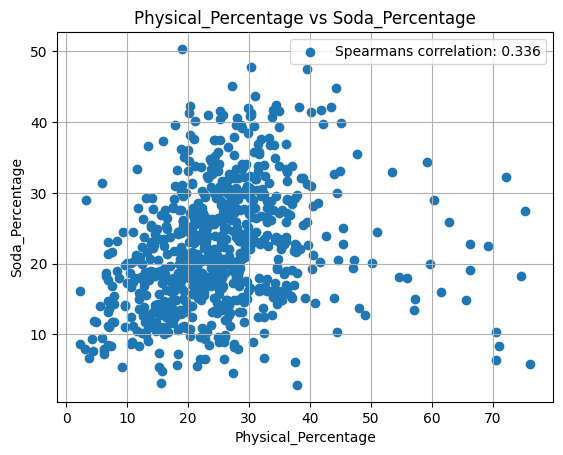

Spearmans correlation: 0.336


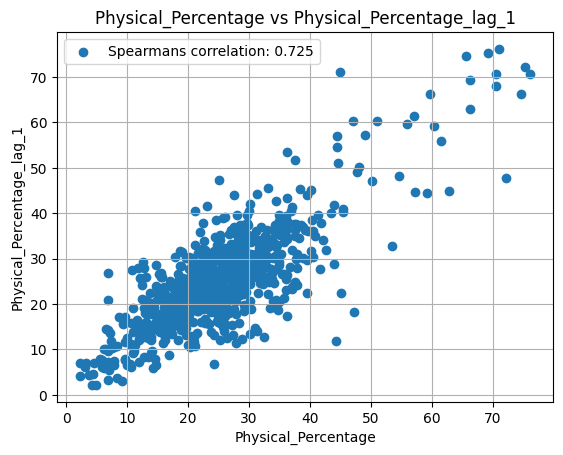

Spearmans correlation: 0.725


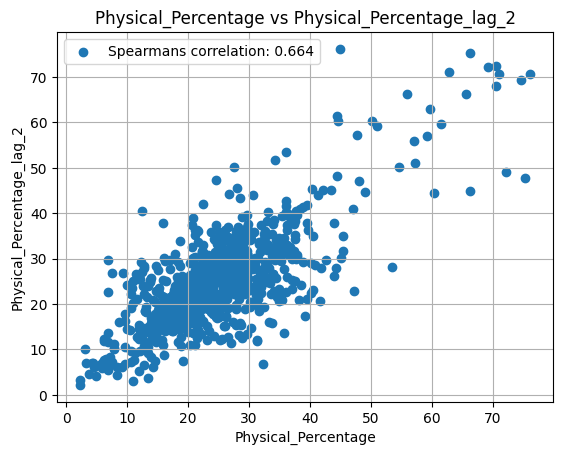

Spearmans correlation: 0.664


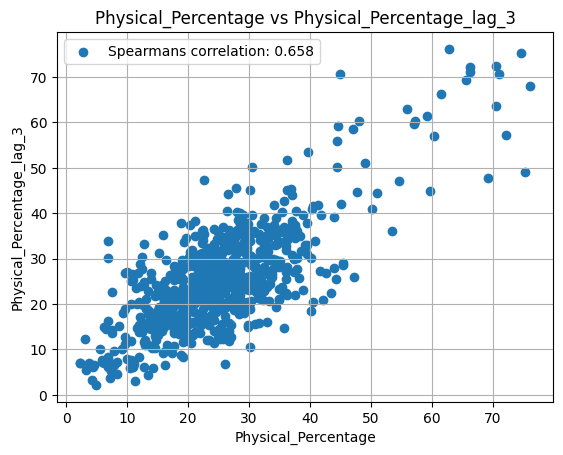

Spearmans correlation: 0.658


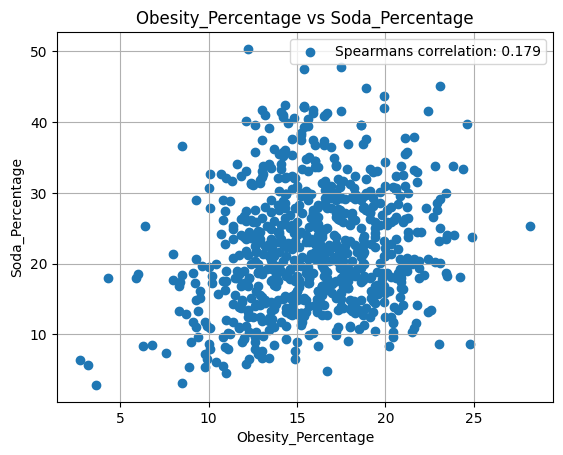

Spearmans correlation: 0.179


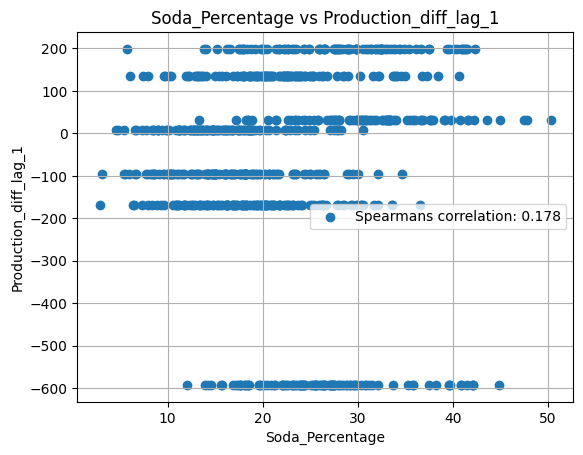

Spearmans correlation: 0.178


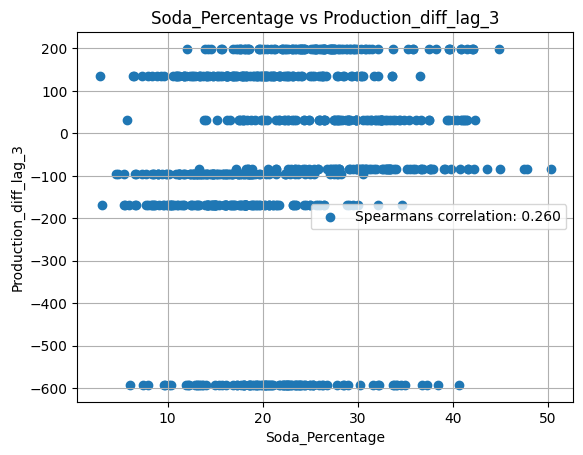

Spearmans correlation: 0.260


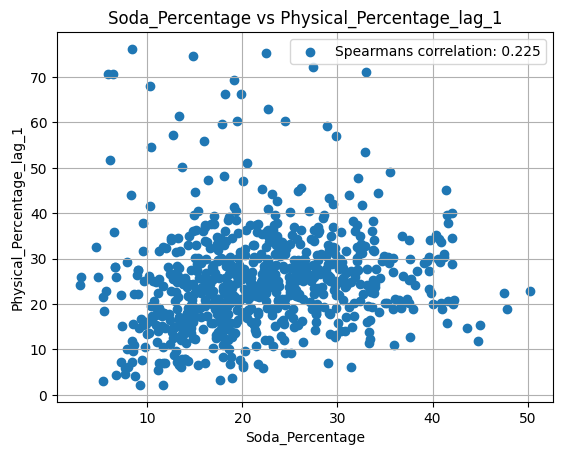

Spearmans correlation: 0.225


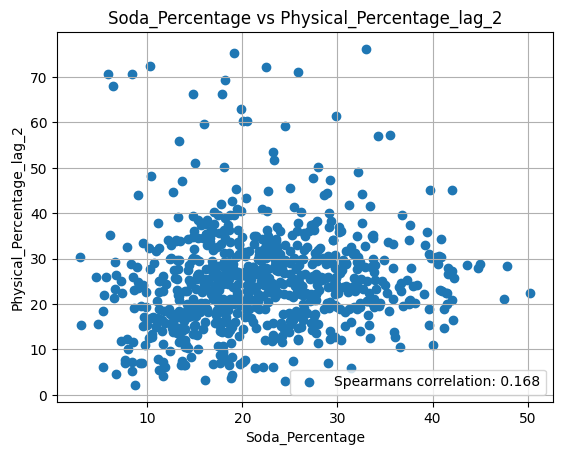

Spearmans correlation: 0.168


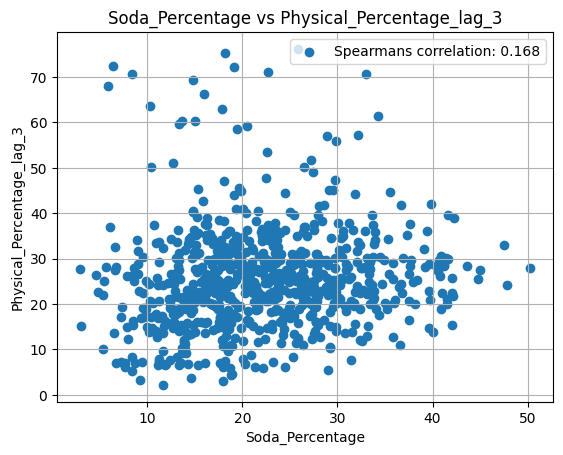

Spearmans correlation: 0.168


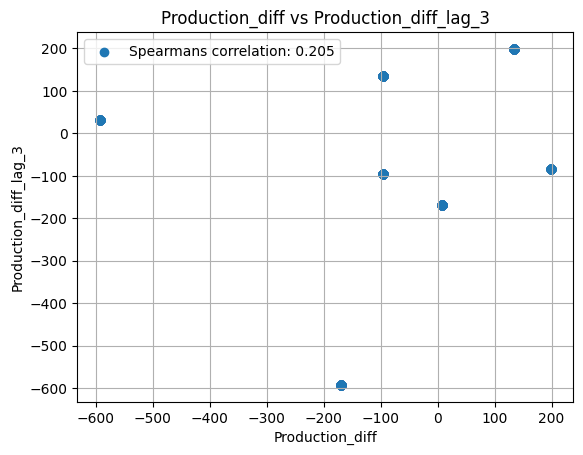

Spearmans correlation: 0.205


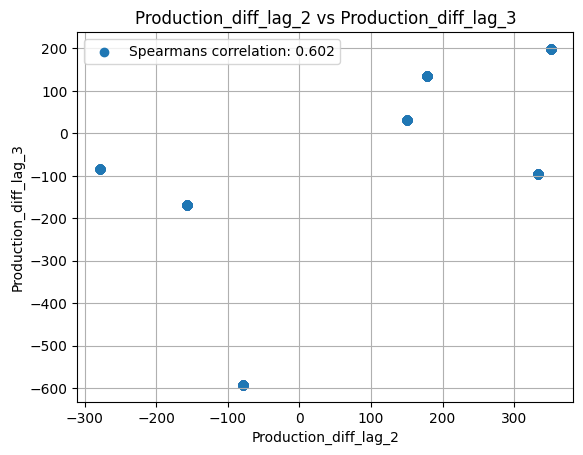

Spearmans correlation: 0.602


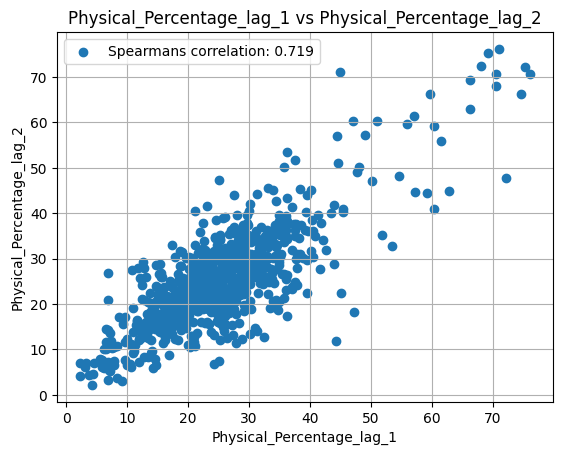

Spearmans correlation: 0.719


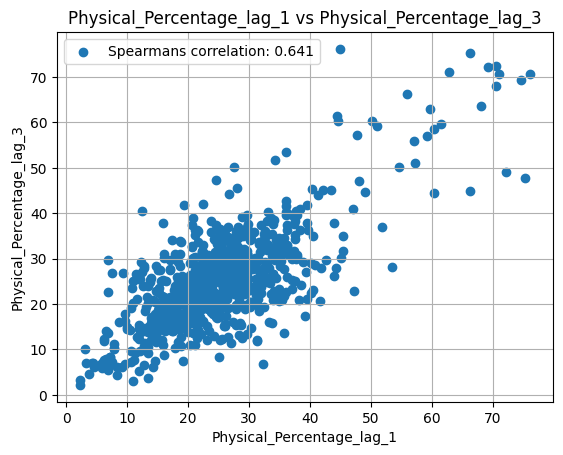

Spearmans correlation: 0.641


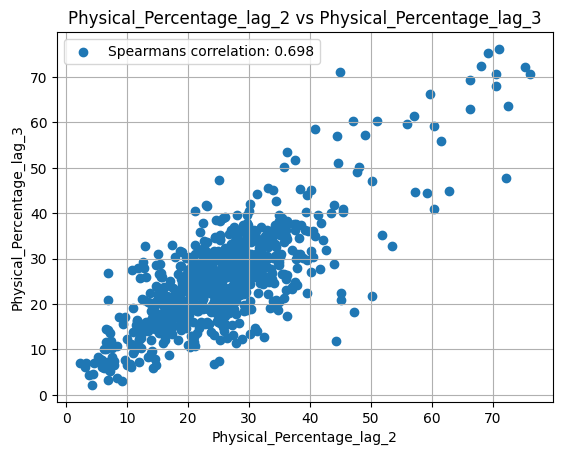

Spearmans correlation: 0.698


In [53]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(len(cebd_6_col)):
    init_col = cebd_6_col[i]
    for j in range(i+1, len(cebd_6_col)):
        current_col = cebd_6_col[j]
        corr, _ = scipy.stats.spearmanr(cebd_6[init_col], cebd_6[current_col])
        if (corr > 0.1):
            plt.scatter(cebd_6[init_col], cebd_6[current_col])
            plt.xlabel(init_col)
            plt.ylabel(current_col)
            plt.title(init_col + ' vs ' + current_col)
            plt.grid()
            plt.legend([str('Spearmans correlation: %.3f' % corr)])
            plt.show()

            
            print('Spearmans correlation: %.3f' % corr)



In [29]:
obesity_data = pd.read_csv('data/Nutrition_Physical_Activity_and_Obesity_Data.csv')
display(obesity_data.head)

C:\Users\user\AppData\Local\Temp\ipykernel_26588\739180406.py:1: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  obesity_data = pd.read_csv('data/Nutrition_Physical_Activity_and_Obesity_Data.csv')


<bound method NDFrame.head of         YearStart  YearEnd LocationAbbr          LocationDesc  \
0            2019     2019           AK                Alaska   
1            2019     2019           AZ               Arizona   
2            2019     2019           DC  District of Columbia   
3            2019     2019           IL              Illinois   
4            2019     2019           MD              Maryland   
...           ...      ...          ...                   ...   
133340       2022     2022           WY               Wyoming   
133341       2022     2022           WY               Wyoming   
133342       2022     2022           WY               Wyoming   
133343       2022     2022           WY               Wyoming   
133344       2022     2022           WY               Wyoming   

                                     Datasource                    Class  \
0       Youth Risk Behavior Surveillance System        Physical Activity   
1       Youth Risk Behavior Surveilla

In [30]:
question_ids = ['Q038', 'Q036', 'Q037', 'Q039']
obesity_related_df = obesity_data[obesity_data['QuestionID'].isin(question_ids)]
obesity_related_df['Data_Value'].isna().sum()


6444

In [32]:
obesity_related_df.dropna(subset=['Data_Value'], inplace=True)
obesity_related_df.dropna(subset=['Race/Ethnicity'], inplace=True)
obesity_related_df

C:\Users\user\AppData\Local\Temp\ipykernel_26588\1332574459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity_related_df.dropna(subset=['Data_Value'], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_26588\1332574459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity_related_df.dropna(subset=['Race/Ethnicity'], inplace=True)


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
4,2019,2019,MD,Maryland,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,NaN,Value,...,"(39.290580964, -76.609260111)",OWS,OWS1,Q039,VALUE,24,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
8,2019,2019,NM,New Mexico,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,NaN,Value,...,"(34.520880952, -106.240580985)",OWS,OWS1,Q039,VALUE,35,Race/Ethnicity,Hispanic,RACE,RACEHIS
17,2019,2019,WV,West Virginia,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,NaN,Value,...,"(38.665510202, -80.712640135)",OWS,OWS1,Q039,VALUE,54,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
28,2015,2015,ME,Maine,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,...,"(45.254228894001, -68.985031336)",OWS,OWS1,Q038,VALUE,23,Race/Ethnicity,Hispanic,RACE,RACEHIS
56,2011,2011,IN,Indiana,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,...,"(39.766910452, -86.149960194)",OWS,OWS1,Q038,VALUE,18,Race/Ethnicity,Hispanic,RACE,RACEHIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133290,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Race/Ethnicity,Hispanic,RACE,RACEHIS
133303,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
133315,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,56,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
133322,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,56,Race/Ethnicity,Hispanic,RACE,RACEHIS


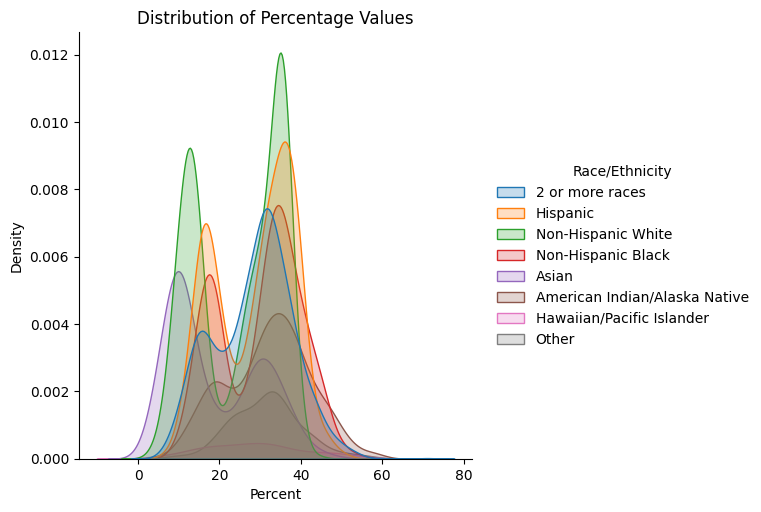

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(obesity_related_df, x='Data_Value', hue='Race/Ethnicity', kind='kde', fill=True)

plt.title('Distribution of Percentage Values')
plt.xlabel('Percent')
plt.ylabel('Density')

# Show the plot
plt.show()

In [48]:
meat_prod = pd.read_csv('Data/Meat_Stats_Meat_Production.csv')
display(meat_prod)
meat_prod.dropna(subset=['Production'], inplace=True)
meat_prod.shape
meat_prod['Production']=meat_prod['Production'].str.replace(',','')
meat_prod['Production'] = meat_prod['Production'].astype(float)
meat_prod['Year'] = meat_prod['Year'].astype(int)
meat_prod.drop(meat_prod[meat_prod.Year<2000].index, inplace=True)
meat_prod = meat_prod.groupby(by=['Date', 'Type of Meat'], as_index=False)['Production'].sum()

rm_meat_prod = meat_prod[meat_prod['Type of Meat'] == 'Red Meat']
p_meat_prod = meat_prod[meat_prod['Type of Meat'] == 'Poultry']

display(rm_meat_prod)
display(p_meat_prod)

,Date,Year,Month,Unit,Production,Animal,Commercial or Federally Inspected,Type of Meat
0,Dec-2023,2023,12,Million Pounds,"2,189.80",Beef,Commercial,Red Meat
1,Nov-2023,2023,11,Million Pounds,"2,280.90",Beef,Commercial,Red Meat
2,Oct-2023,2023,10,Million Pounds,"2,340.90",Beef,Commercial,Red Meat
3,Sep-2023,2023,9,Million Pounds,"2,149.40",Beef,Commercial,Red Meat
4,Aug-2023,2023,8,Million Pounds,"2,363.50",Beef,Commercial,Red Meat
...,...,...,...,...,...,...,...,...
13590,May-1921,1921,5,Million Pounds,NaN,Turkey,Federally Inspected,Poultry
13591,Apr-1921,1921,4,Million Pounds,NaN,Turkey,Federally Inspected,Poultry
13592,Mar-1921,1921,3,Million Pounds,NaN,Turkey,Federally Inspected,Poultry
13593,Feb-1921,1921,2,Million Pounds,NaN,Turkey,Federally Inspected,Poultry


,Date,Type of Meat,Production
1,Apr-2000,Red Meat,6878.0
3,Apr-2001,Red Meat,6965.0
5,Apr-2002,Red Meat,7754.2
7,Apr-2003,Red Meat,7642.6
9,Apr-2004,Red Meat,7382.4
...,...,...,...
567,Sep-2019,Red Meat,8844.3
569,Sep-2020,Red Meat,9360.2
571,Sep-2021,Red Meat,9107.9
573,Sep-2022,Red Meat,9276.7


,Date,Type of Meat,Production
0,Apr-2000,Poultry,2810.1
2,Apr-2001,Poultry,3019.9
4,Apr-2002,Poultry,3246.3
6,Apr-2003,Poultry,3245.6
8,Apr-2004,Poultry,3327.3
...,...,...,...
566,Sep-2019,Poultry,4228.9
568,Sep-2020,Poultry,4401.8
570,Sep-2021,Poultry,4448.5
572,Sep-2022,Poultry,4500.4


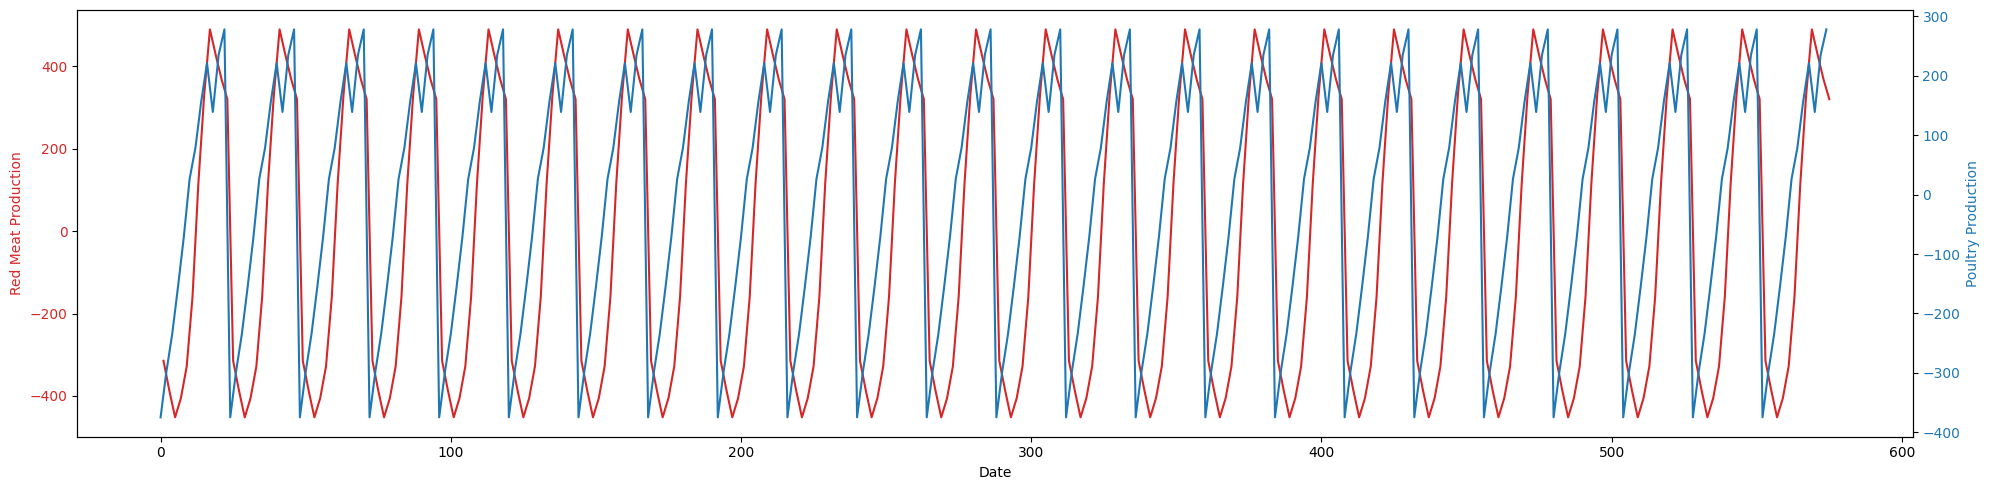

In [52]:
import statsmodels
result1 = statsmodels.tsa.seasonal.seasonal_decompose(rm_meat_prod['Production'].dropna(), model='additive', period=12)
result2 = statsmodels.tsa.seasonal.seasonal_decompose(p_meat_prod['Production'].dropna(), model='additive', period=12)

#Extract the trend components 
trend1 = result1.trend 
trend2 = result2.trend

# Extract the seasonal components
seasonal_pattern1 = result1.seasonal
seasonal_pattern2 = result2.seasonal  

# PLOT OF EACH OF THESE SEASONAL PATTERNS ON THE SAME X AXIS but on a different y axis to account for scale
#can u set the figsize to  10,5

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Set the size of the figure
fig.set_figwidth(20)
fig.set_figheight(5)

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Red Meat Production', color=color)
ax1.plot(seasonal_pattern1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Poultry Production', color=color)
ax2.plot(seasonal_pattern2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()